Dataset available at: https://archive.ics.uci.edu/dataset/231/pamap2+physical+activity+monitoring

# Phase 1: Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import math

We create abstract classes to load the data, the decision behind this is to ovewrite the methods in case of loading any other dataset in the future, as each dataset has different file types and structures

In [2]:
from abc import ABC, abstractmethod

class AbstractDataLoader(ABC):
    def __init__(self, src_path:str, keys:list, file_extension:str, delimiter:str):
        self.src_path = src_path
        self.keys = keys
        self.file_extension = file_extension
        self.delimiter = delimiter     
        
    @abstractmethod
    def load_data(self):
        pass

    @abstractmethod
    def _is_valid_extension(self, file):
        pass

In [3]:
class DataLoader(AbstractDataLoader):
    def __init__(self, src_path:str, keys:list, file_extension:str, delimiter:str):
        super().__init__(src_path, keys, file_extension, delimiter)
        
    
    def load_data(self):
        dataframes = []
        for file in os.listdir(self.src_path):
            if self._is_valid_extension(file):  
                df = pd.read_csv(os.path.join(self.src_path, file), delimiter=self.delimiter, names=self.keys)
                df['subject_id'] = self._get_subject_id(file)
                dataframes.append(df)
        final_df = pd.concat(dataframes, ignore_index=True)
        return final_df

                
    def _is_valid_extension(self, file):
        return file.endswith(self.file_extension)

    def _get_subject_id(self, file):
        return file.split('.')[0]

We perform data loading

In [4]:
src = "dataset/PAMAP2_Dataset/Protocol"
keys = [
    "timestamp",
    "activityID",
    "heart_rate_bpm",
    # IMU Hand (columns 4–20)
    "IMU_Hand_temperature",
    "IMU_Hand_acceleration_16g_x",
    "IMU_Hand_acceleration_16g_y",
    "IMU_Hand_acceleration_16g_z",
    "IMU_Hand_acceleration_6g_x",
    "IMU_Hand_acceleration_6g_y",
    "IMU_Hand_acceleration_6g_z",
    "IMU_Hand_gyroscope_x",
    "IMU_Hand_gyroscope_y",
    "IMU_Hand_gyroscope_z",
    "IMU_Hand_magnetometer_x",
    "IMU_Hand_magnetometer_y",
    "IMU_Hand_magnetometer_z",
    "IMU_Hand_orientation_1",
    "IMU_Hand_orientation_2",
    "IMU_Hand_orientation_3",
    "IMU_Hand_orientation_4",
    # IMU Chest (columns 21–37)
    "IMU_Chest_temperature",
    "IMU_Chest_acceleration_16g_x",
    "IMU_Chest_acceleration_16g_y",
    "IMU_Chest_acceleration_16g_z",
    "IMU_Chest_acceleration_6g_x",
    "IMU_Chest_acceleration_6g_y",
    "IMU_Chest_acceleration_6g_z",
    "IMU_Chest_gyroscope_x",
    "IMU_Chest_gyroscope_y",
    "IMU_Chest_gyroscope_z",
    "IMU_Chest_magnetometer_x",
    "IMU_Chest_magnetometer_y",
    "IMU_Chest_magnetometer_z",
    "IMU_Chest_orientation_1",
    "IMU_Chest_orientation_2",
    "IMU_Chest_orientation_3",
    "IMU_Chest_orientation_4",
    # IMU Ankle (columns 38–54)
    "IMU_Ankle_temperature",
    "IMU_Ankle_acceleration_16g_x",
    "IMU_Ankle_acceleration_16g_y",
    "IMU_Ankle_acceleration_16g_z",
    "IMU_Ankle_acceleration_6g_x",
    "IMU_Ankle_acceleration_6g_y",
    "IMU_Ankle_acceleration_6g_z",
    "IMU_Ankle_gyroscope_x",
    "IMU_Ankle_gyroscope_y",
    "IMU_Ankle_gyroscope_z",
    "IMU_Ankle_magnetometer_x",
    "IMU_Ankle_magnetometer_y",
    "IMU_Ankle_magnetometer_z",
    "IMU_Ankle_orientation_1",
    "IMU_Ankle_orientation_2",
    "IMU_Ankle_orientation_3",
    "IMU_Ankle_orientation_4"
]

file_extension = '.dat'
delimiter = r'\s+'
data_loader_pamap = DataLoader(src, keys, file_extension, delimiter)
pamap_data = data_loader_pamap.load_data()

pamap_data.shape

(2872533, 55)

In [24]:
pamap_data

,timestamp,activityID,heart_rate_bpm,IMU_Hand_temperature,IMU_Hand_acceleration_16g_x,IMU_Hand_acceleration_16g_y,IMU_Hand_acceleration_16g_z,IMU_Hand_acceleration_6g_x,IMU_Hand_acceleration_6g_y,IMU_Hand_acceleration_6g_z,...,IMU_Ankle_gyroscope_y,IMU_Ankle_gyroscope_z,IMU_Ankle_magnetometer_x,IMU_Ankle_magnetometer_y,IMU_Ankle_magnetometer_z,IMU_Ankle_orientation_1,IMU_Ankle_orientation_2,IMU_Ankle_orientation_3,IMU_Ankle_orientation_4,subject_id
2928,37.66,1,NaN,30.375,2.21530,8.27915,5.58753,2.24689,8.55387,5.77143,...,-0.027714,0.001752,-61.1081,-36.863600,-58.369600,1.000000,0.000000,0.000000,0.000000,subject101
2929,37.67,1,NaN,30.375,2.29196,7.67288,5.74467,2.27373,8.14592,5.78739,...,0.000945,0.006007,-60.8916,-36.319700,-58.365600,1.000000,0.000000,0.000000,0.000000,subject101
2930,37.68,1,NaN,30.375,2.29090,7.14240,5.82342,2.26966,7.66268,5.78846,...,-0.052422,-0.004882,-60.3407,-35.784200,-58.611900,1.000000,0.000000,0.000000,0.000000,subject101
2931,37.69,1,NaN,30.375,2.21800,7.14365,5.89930,2.22177,7.25535,5.88000,...,-0.018844,0.026950,-60.7646,-37.102800,-57.879900,1.000000,0.000000,0.000000,0.000000,subject101
2932,37.70,1,100.0,30.375,2.30106,7.25857,6.09259,2.20720,7.24042,5.95555,...,-0.048878,-0.006328,-60.2040,-37.122500,-57.884700,1.000000,0.000000,0.000000,0.000000,subject101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2872015,95.06,24,NaN,25.125,4.99466,6.01881,5.59830,4.90787,6.05780,5.68357,...,-0.012885,0.005878,-45.7855,-0.831734,-0.170139,0.522929,-0.291612,0.705786,-0.378648,subject109
2872016,95.07,24,NaN,25.125,5.02764,5.90369,5.48372,4.89090,5.95209,5.56301,...,0.003629,-0.004235,-46.0331,-0.817288,0.538134,0.522880,-0.291694,0.705895,-0.378450,subject109
2872017,95.08,24,NaN,25.125,5.06409,5.71370,5.48491,4.97981,5.87584,5.45738,...,-0.035176,-0.002309,-45.5140,-1.229410,0.540438,0.522625,-0.291978,0.706161,-0.378084,subject109
2872018,95.09,24,162.0,25.125,5.13914,5.63724,5.48629,4.97690,5.69448,5.29167,...,-0.036457,-0.007076,-45.9093,-0.565555,0.680109,0.522536,-0.291955,0.706426,-0.377733,subject109


We discard the label 0, because the documentation says that it is a transient activity, which is not relevant for the experiments

In [5]:
pamap_data = pamap_data[pamap_data['activityID'] != 0]
pamap_data.shape

(1942872, 55)

# EDA

### 1. Dimensions and head

In [6]:
pamap_data.shape, pamap_data.head(10)

((1942872, 55),
       timestamp  activityID  heart_rate_bpm  IMU_Hand_temperature  \
 2928      37.66           1             NaN                30.375   
 2929      37.67           1             NaN                30.375   
 2930      37.68           1             NaN                30.375   
 2931      37.69           1             NaN                30.375   
 2932      37.70           1           100.0                30.375   
 2933      37.71           1             NaN                30.375   
 2934      37.72           1             NaN                30.375   
 2935      37.73           1             NaN                30.375   
 2936      37.74           1             NaN                30.375   
 2937      37.75           1             NaN                30.375   
 
       IMU_Hand_acceleration_16g_x  IMU_Hand_acceleration_16g_y  \
 2928                      2.21530                      8.27915   
 2929                      2.29196                      7.67288   
 2930      

We can observe that the dataframe has:
1. **Features**: 55
2. **Samples**: 1,942,872

### 2. NaNs

In [7]:
missing = pamap_data.isna().sum()
missing


timestamp                             0
activityID                            0
heart_rate_bpm                  1765464
IMU_Hand_temperature              11124
IMU_Hand_acceleration_16g_x       11124
IMU_Hand_acceleration_16g_y       11124
IMU_Hand_acceleration_16g_z       11124
IMU_Hand_acceleration_6g_x        11124
IMU_Hand_acceleration_6g_y        11124
IMU_Hand_acceleration_6g_z        11124
IMU_Hand_gyroscope_x              11124
IMU_Hand_gyroscope_y              11124
IMU_Hand_gyroscope_z              11124
IMU_Hand_magnetometer_x           11124
IMU_Hand_magnetometer_y           11124
IMU_Hand_magnetometer_z           11124
IMU_Hand_orientation_1            11124
IMU_Hand_orientation_2            11124
IMU_Hand_orientation_3            11124
IMU_Hand_orientation_4            11124
IMU_Chest_temperature              2420
IMU_Chest_acceleration_16g_x       2420
IMU_Chest_acceleration_16g_y       2420
IMU_Chest_acceleration_16g_z       2420
IMU_Chest_acceleration_6g_x        2420


In [8]:
missing_ratio = pamap_data.isna().mean() * 100
print(missing_ratio)

timestamp                        0.000000
activityID                       0.000000
heart_rate_bpm                  90.868776
IMU_Hand_temperature             0.572554
IMU_Hand_acceleration_16g_x      0.572554
IMU_Hand_acceleration_16g_y      0.572554
IMU_Hand_acceleration_16g_z      0.572554
IMU_Hand_acceleration_6g_x       0.572554
IMU_Hand_acceleration_6g_y       0.572554
IMU_Hand_acceleration_6g_z       0.572554
IMU_Hand_gyroscope_x             0.572554
IMU_Hand_gyroscope_y             0.572554
IMU_Hand_gyroscope_z             0.572554
IMU_Hand_magnetometer_x          0.572554
IMU_Hand_magnetometer_y          0.572554
IMU_Hand_magnetometer_z          0.572554
IMU_Hand_orientation_1           0.572554
IMU_Hand_orientation_2           0.572554
IMU_Hand_orientation_3           0.572554
IMU_Hand_orientation_4           0.572554
IMU_Chest_temperature            0.124558
IMU_Chest_acceleration_16g_x     0.124558
IMU_Chest_acceleration_16g_y     0.124558
IMU_Chest_acceleration_16g_z     0

We observe that we have a lot of missing values, notice that the feature with most NaNs is "heart_rate_bpm", this is due to the sensor sampling frequency, since it is working at 9Hz.

![image.png](images\img1.png)

The difference in sampling frequency between IMUs and Heart Rate monitor is more than 10 times, which explains the large amount of missing data in this feature. 


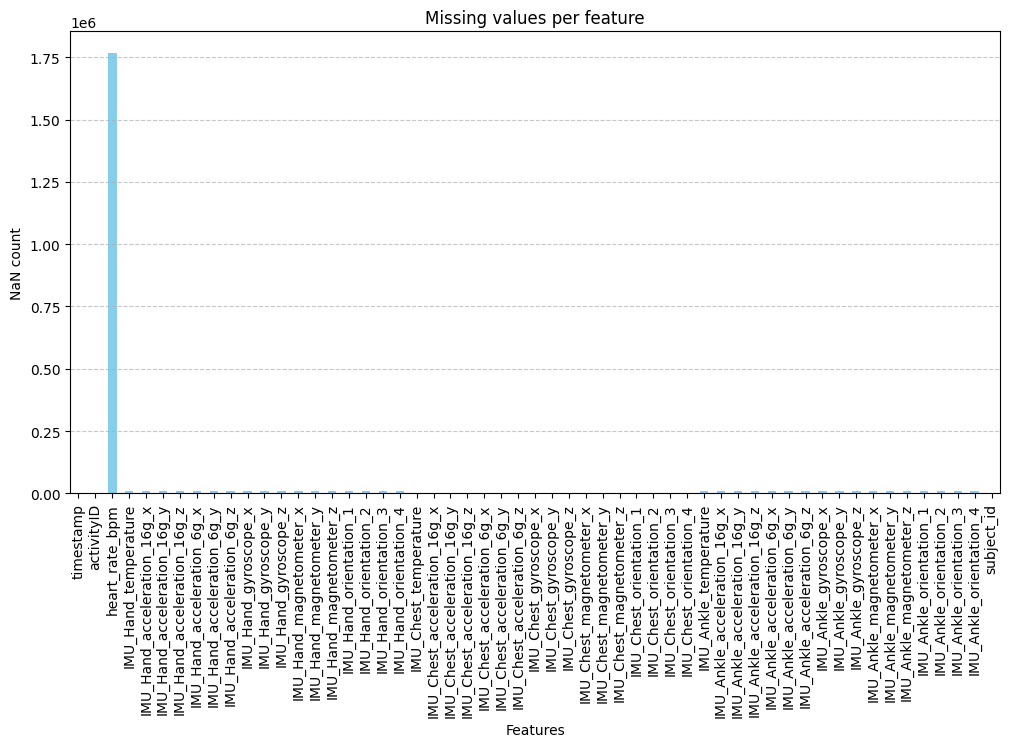

In [9]:
plt.figure(figsize=(12, 6))
missing.plot(kind='bar', color='skyblue')
plt.title('Missing values per feature')
plt.xlabel('Features')
plt.ylabel('NaN count')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### 3. Datatypes

In [10]:
pamap_data.dtypes

timestamp                       float64
activityID                        int64
heart_rate_bpm                  float64
IMU_Hand_temperature            float64
IMU_Hand_acceleration_16g_x     float64
IMU_Hand_acceleration_16g_y     float64
IMU_Hand_acceleration_16g_z     float64
IMU_Hand_acceleration_6g_x      float64
IMU_Hand_acceleration_6g_y      float64
IMU_Hand_acceleration_6g_z      float64
IMU_Hand_gyroscope_x            float64
IMU_Hand_gyroscope_y            float64
IMU_Hand_gyroscope_z            float64
IMU_Hand_magnetometer_x         float64
IMU_Hand_magnetometer_y         float64
IMU_Hand_magnetometer_z         float64
IMU_Hand_orientation_1          float64
IMU_Hand_orientation_2          float64
IMU_Hand_orientation_3          float64
IMU_Hand_orientation_4          float64
IMU_Chest_temperature           float64
IMU_Chest_acceleration_16g_x    float64
IMU_Chest_acceleration_16g_y    float64
IMU_Chest_acceleration_16g_z    float64
IMU_Chest_acceleration_6g_x     float64


### 4. Statistical summary

In [11]:
stats = pamap_data.describe().T
stats

,count,mean,std,min,25%,50%,75%,max
timestamp,1942872.0,1705.202040,1093.462676,3.120000e+01,744.540000,1480.330000,2663.610000,4245.680000
activityID,1942872.0,8.081830,6.174789,1.000000e+00,3.000000,6.000000,13.000000,24.000000
heart_rate_bpm,177408.0,107.468502,26.977609,5.700000e+01,86.000000,104.000000,124.000000,202.000000
IMU_Hand_temperature,1931748.0,32.757523,1.791983,2.487500e+01,31.687500,33.187500,34.062500,35.500000
IMU_Hand_acceleration_16g_x,1931748.0,-4.938311,6.231142,-1.453670e+02,-8.955800,-5.426670,-0.943004,62.859600
IMU_Hand_acceleration_16g_y,1931748.0,3.580308,6.887907,-1.043010e+02,1.048068,3.523155,6.454320,155.699000
IMU_Hand_acceleration_16g_z,1931748.0,3.609347,3.960176,-1.014520e+02,1.161655,3.441330,6.538525,157.760000
IMU_Hand_acceleration_6g_x,1931748.0,-4.871064,6.237104,-6.121470e+01,-8.854415,-5.353635,-0.892206,52.821400
IMU_Hand_acceleration_6g_y,1931748.0,3.569088,6.586273,-6.184170e+01,1.047087,3.562085,6.458670,62.259800
IMU_Hand_acceleration_6g_z,1931748.0,3.794033,3.946330,-6.193470e+01,1.363960,3.672370,6.787760,61.923400


### 5. Classes distribution

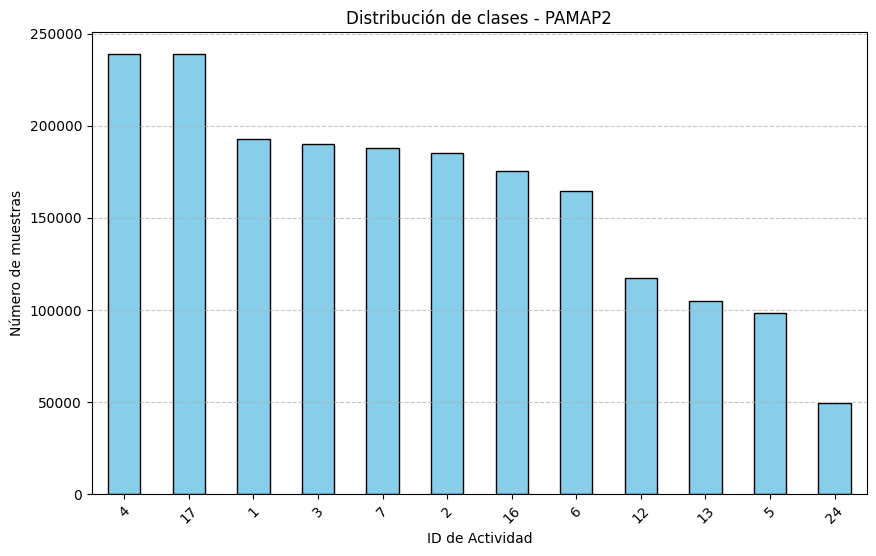

In [12]:
class_distribution_pamap = pamap_data['activityID'].value_counts()
class_distribution_pamap

plt.figure(figsize=(10, 6))
class_distribution_pamap.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Distribución de clases - PAMAP2')
plt.xlabel('ID de Actividad')
plt.ylabel('Número de muestras')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

We notice a clear class imbalance, where the minority class is activity 24 (rope jumping), and the class with more samples is activity 4 (walking).

This class imbalance sugest that we need to employ techniques of data imputation or use more precise metrics like F1-Macro and precision-recall curve

### 6. Correlation


In [13]:
pamap_filtered = pamap_data.drop(columns=['activityID', 'timestamp'], errors='ignore')
pamap_numeric = pamap_filtered.select_dtypes(include=['number'])
pamap_corr_matrix = pamap_numeric.corr(method='pearson')


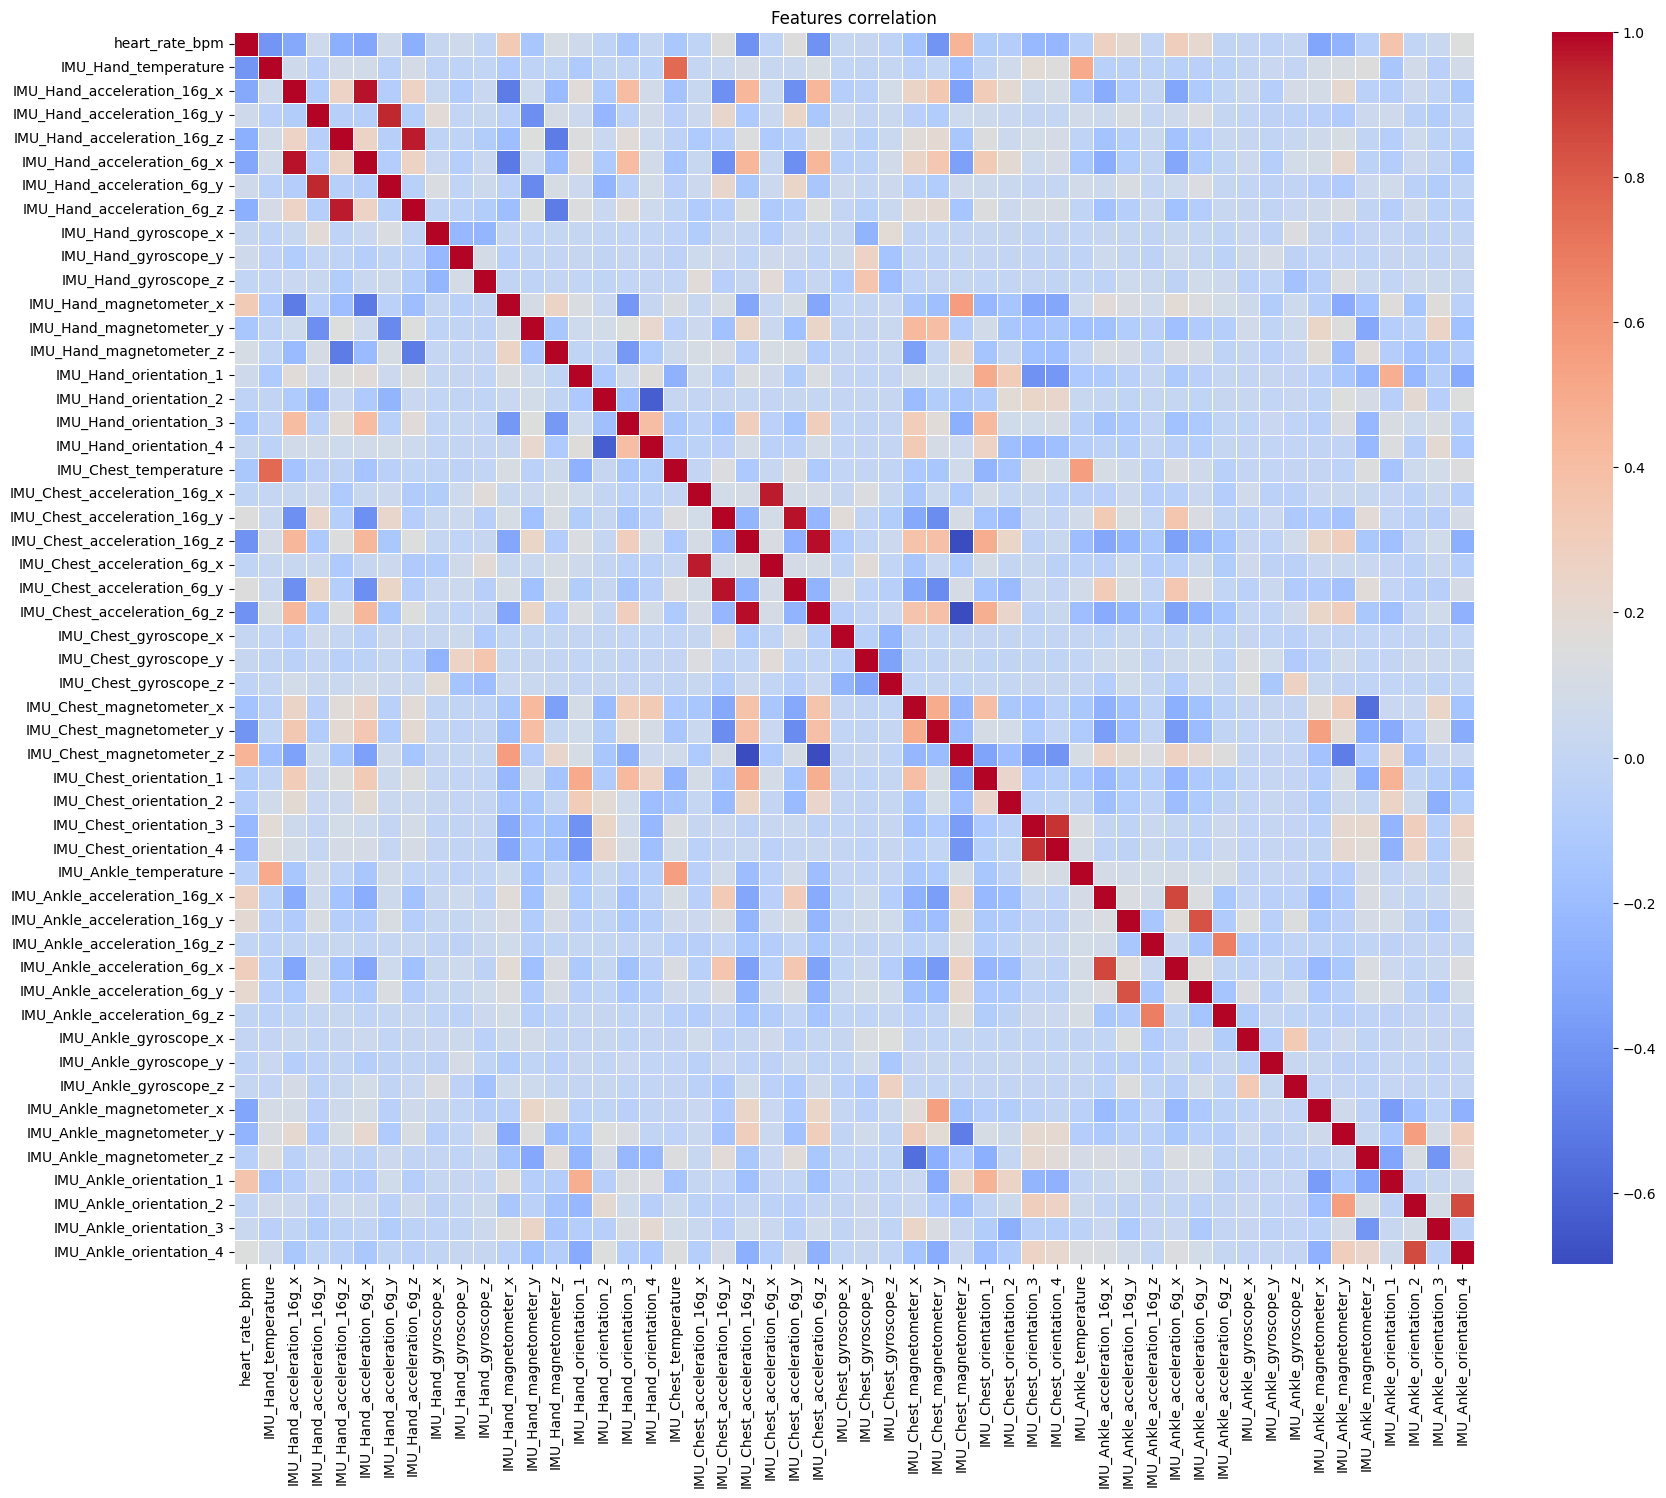

In [14]:
plt.figure(figsize=(20, 16))
sns.heatmap(
    pamap_corr_matrix,
    cmap='coolwarm',        
    annot=False,            
    linewidths=0.5
)

plt.title('Features correlation')
plt.show()

In the next cell we print the column names with high correlation, in this case we select a 0.8 threshold ot indicate high correlation

In [15]:
threshold = 0.8
mask = np.abs(pamap_corr_matrix) > threshold

np.fill_diagonal(mask.values, False)

high_corr_pairs = [
    (col1, col2, pamap_corr_matrix.loc[col1, col2])
    for col1 in pamap_corr_matrix.columns
    for col2 in pamap_corr_matrix.columns
    if mask.loc[col1, col2]
]

for pair in high_corr_pairs:
    print(f"{pair[0]} - {pair[1]}: {pair[2]}")

IMU_Hand_acceleration_16g_x - IMU_Hand_acceleration_6g_x: 0.9785998110326629
IMU_Hand_acceleration_16g_y - IMU_Hand_acceleration_6g_y: 0.9450856015454595
IMU_Hand_acceleration_16g_z - IMU_Hand_acceleration_6g_z: 0.9644747695346865
IMU_Hand_acceleration_6g_x - IMU_Hand_acceleration_16g_x: 0.9785998110326629
IMU_Hand_acceleration_6g_y - IMU_Hand_acceleration_16g_y: 0.9450856015454595
IMU_Hand_acceleration_6g_z - IMU_Hand_acceleration_16g_z: 0.9644747695346865
IMU_Chest_acceleration_16g_x - IMU_Chest_acceleration_6g_x: 0.9633232160719073
IMU_Chest_acceleration_16g_y - IMU_Chest_acceleration_6g_y: 0.9766406333877611
IMU_Chest_acceleration_16g_z - IMU_Chest_acceleration_6g_z: 0.9846647002901986
IMU_Chest_acceleration_6g_x - IMU_Chest_acceleration_16g_x: 0.9633232160719073
IMU_Chest_acceleration_6g_y - IMU_Chest_acceleration_16g_y: 0.9766406333877611
IMU_Chest_acceleration_6g_z - IMU_Chest_acceleration_16g_z: 0.9846647002901986
IMU_Chest_orientation_3 - IMU_Chest_orientation_4: 0.91919903770

### 7. Data distribution

In [16]:
# We select all columns except the ones representing timestamp, subject id and activity id
selected_cols = [col for col in pamap_data.columns if col not in ['activityID', 'timestamp', 'subject_id']]


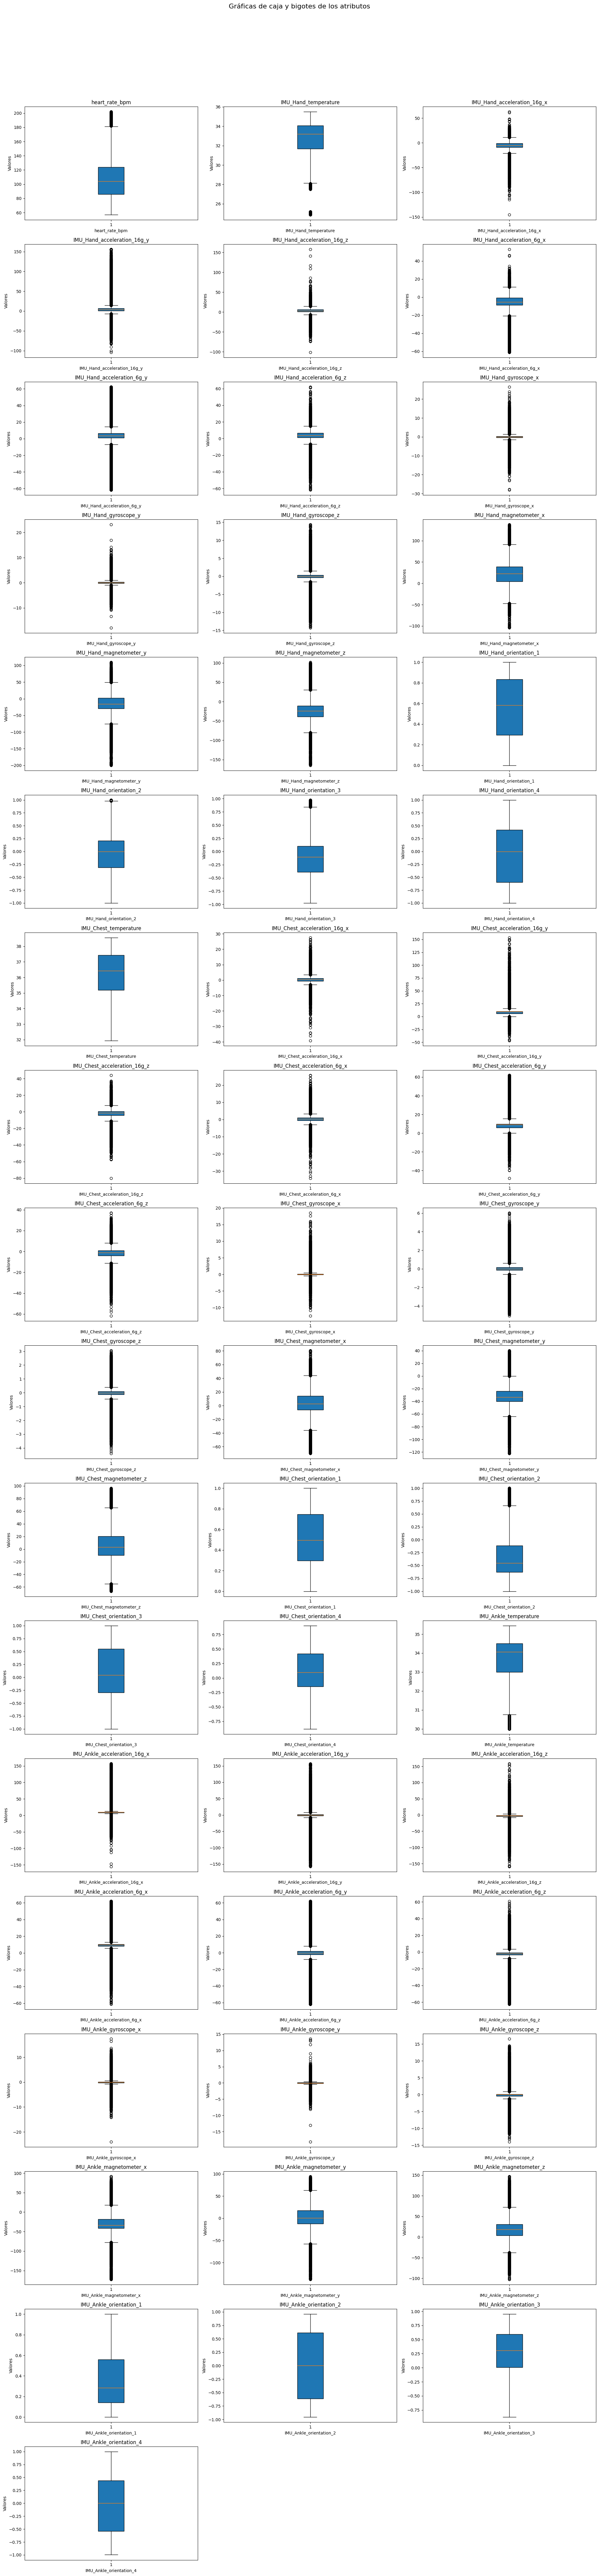

In [17]:
pamap_numeric = pamap_data[selected_cols]

num_attributes = pamap_numeric.shape[1]

cols = 3
rows = math.ceil(num_attributes / cols)

plt.figure(figsize=(20, 5 * rows))

for i, col in enumerate(pamap_numeric.columns):
    ax = plt.subplot(rows, cols, i + 1)
    ax.boxplot(pamap_numeric[col].dropna(), vert=True, patch_artist=True)
    ax.set_title(col)
    ax.set_xlabel(col)
    ax.set_ylabel("Valores")

plt.suptitle("Gráficas de caja y bigotes de los atributos", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [18]:
# selected_cols = [col for col in pamap_data.columns if col not in ['activityID', 'timestamp', 'subject_id']]
pamap_data.columns

Index(['timestamp', 'activityID', 'heart_rate_bpm', 'IMU_Hand_temperature',
       'IMU_Hand_acceleration_16g_x', 'IMU_Hand_acceleration_16g_y',
       'IMU_Hand_acceleration_16g_z', 'IMU_Hand_acceleration_6g_x',
       'IMU_Hand_acceleration_6g_y', 'IMU_Hand_acceleration_6g_z',
       'IMU_Hand_gyroscope_x', 'IMU_Hand_gyroscope_y', 'IMU_Hand_gyroscope_z',
       'IMU_Hand_magnetometer_x', 'IMU_Hand_magnetometer_y',
       'IMU_Hand_magnetometer_z', 'IMU_Hand_orientation_1',
       'IMU_Hand_orientation_2', 'IMU_Hand_orientation_3',
       'IMU_Hand_orientation_4', 'IMU_Chest_temperature',
       'IMU_Chest_acceleration_16g_x', 'IMU_Chest_acceleration_16g_y',
       'IMU_Chest_acceleration_16g_z', 'IMU_Chest_acceleration_6g_x',
       'IMU_Chest_acceleration_6g_y', 'IMU_Chest_acceleration_6g_z',
       'IMU_Chest_gyroscope_x', 'IMU_Chest_gyroscope_y',
       'IMU_Chest_gyroscope_z', 'IMU_Chest_magnetometer_x',
       'IMU_Chest_magnetometer_y', 'IMU_Chest_magnetometer_z',
       'IMU_C

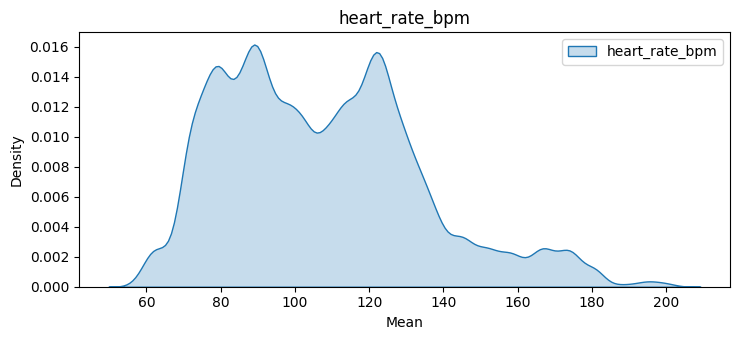

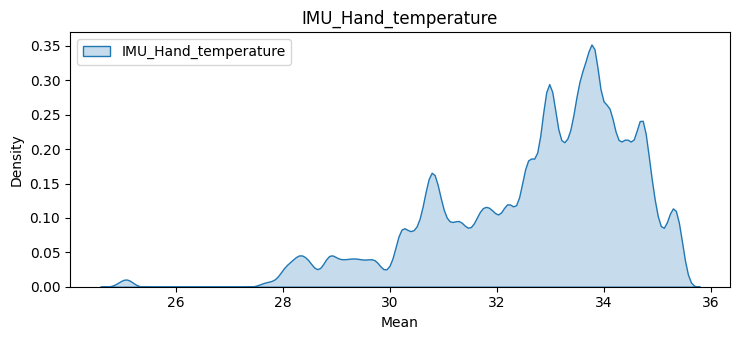

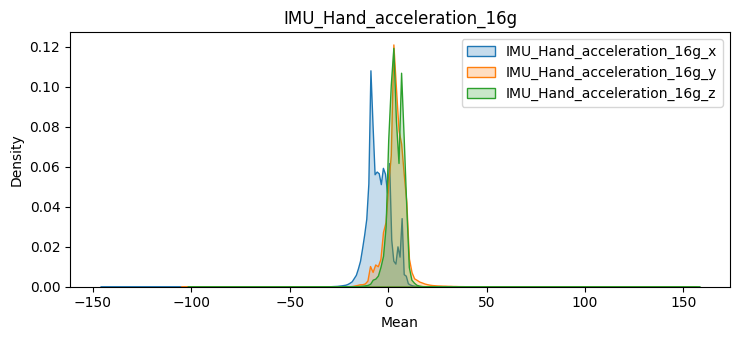

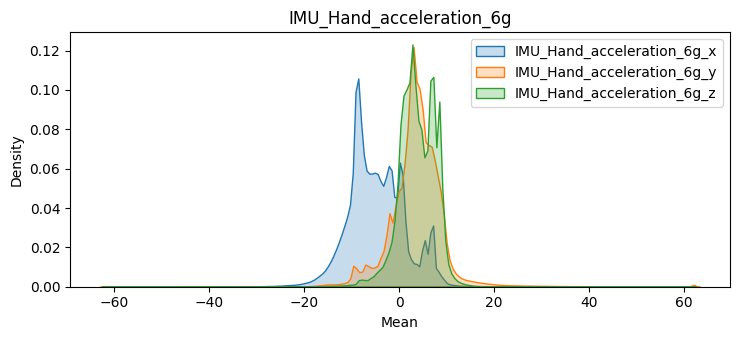

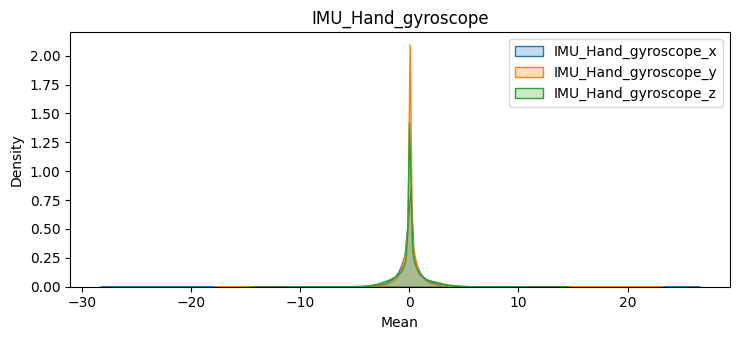

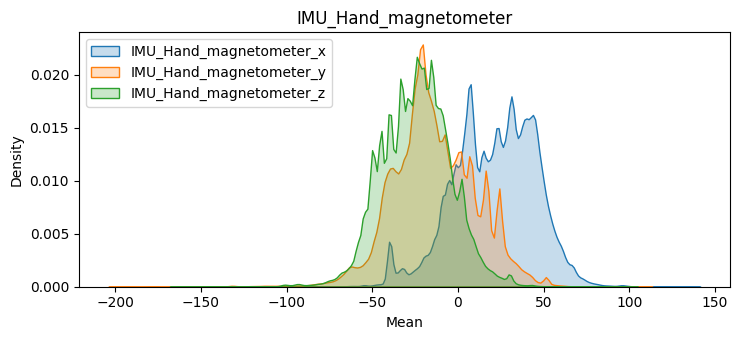

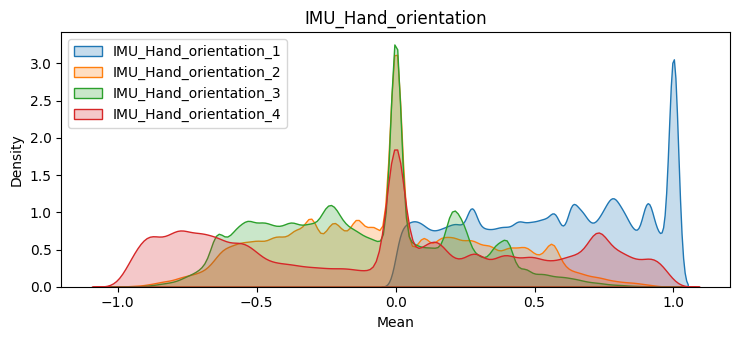

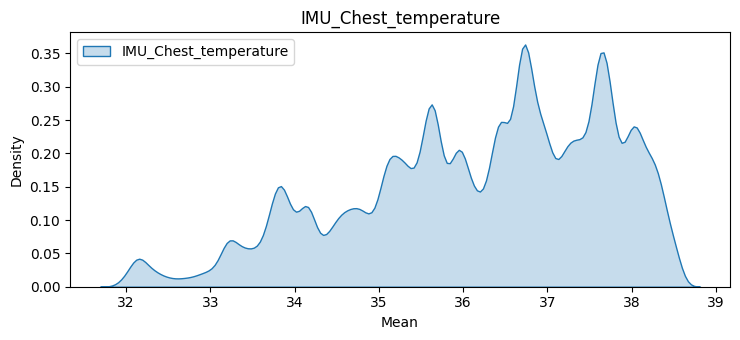

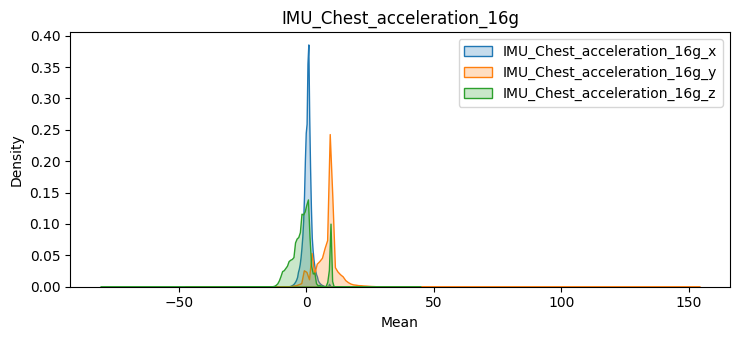

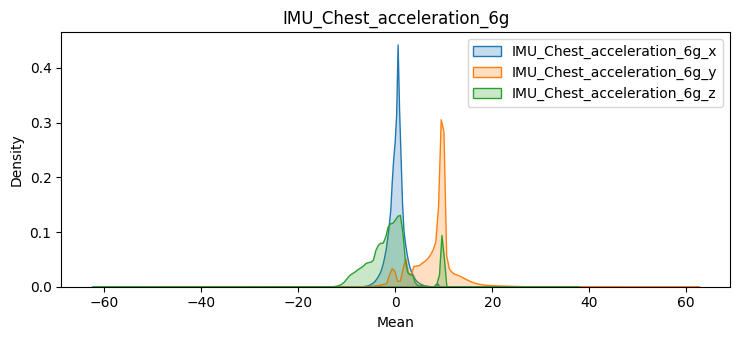

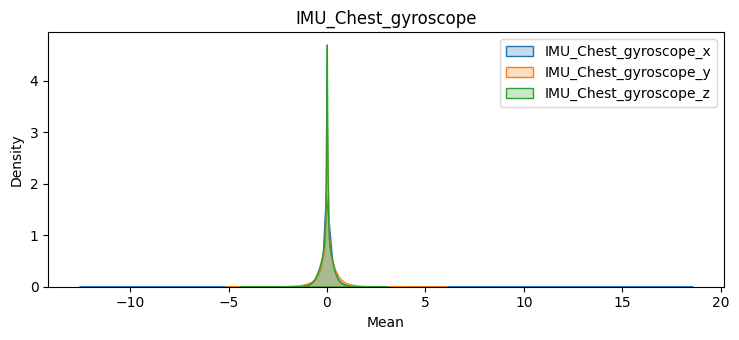

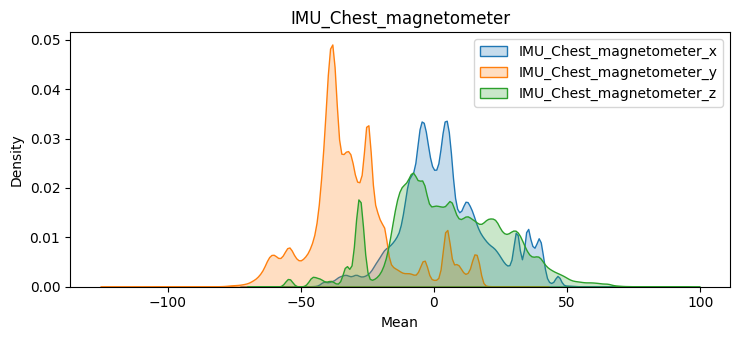

KeyboardInterrupt: 

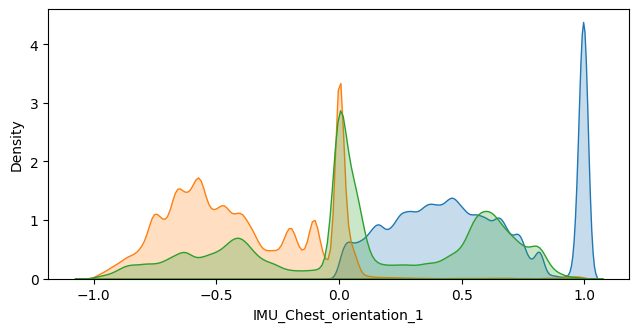

In [19]:
processed_cols = set()


for col in selected_cols:    
    if col in processed_cols:
        continue

    # If the column has orientation like _x, _y or _z, we group it into a single plot
    if "orientation" in col:
        # We take as"
        base = col.rsplit('_', 1)[0]
        # We obtain all cols that start with that base
        group_cols = [c for c in selected_cols if c.startswith(base)]
        if group_cols:
            plt.figure(figsize=(7.5, 3.5))
            for sensor in sorted(group_cols):
                sns.kdeplot(pamap_data[sensor], fill=True, label=sensor)
            plt.xlabel('Mean')
            plt.ylabel('Density')
            plt.title(base)
            plt.legend()
            plt.tight_layout()  # Ajusta la figura para evitar cortes
            plt.show()
            processed_cols.update(group_cols)
        continue

    # Case of groupable bars by orientation: _x, _y, _z
    if col.endswith('_x'):
        base = col[:-2]  # Delete suffix "_x"
        col_y = base + '_y'
        col_z = base + '_z'
        if col_y in selected_cols and col_z in selected_cols:
            plt.figure(figsize=(7.5, 3.5))
            for sensor in [col, col_y, col_z]:
                sns.kdeplot(pamap_data[sensor], fill=True, label=sensor)
            plt.xlabel('Mean')
            plt.ylabel('Density')
            plt.title(base)
            plt.legend()
            plt.tight_layout()
            plt.show()
            processed_cols.update({col, col_y, col_z})
        else:
            plt.figure(figsize=(7.5, 3.5))
            sns.kdeplot(pamap_data[col], fill=True, label=col)
            plt.xlabel('Mean')
            plt.ylabel('Density')
            plt.title(col)
            plt.legend()
            plt.tight_layout()
            plt.show()
            processed_cols.add(col)

    elif col.endswith('_y') or col.endswith('_z'):
        # If this executes, is because the _x, _y and _z group was not found
        plt.figure(figsize=(7.5, 3.5))
        sns.kdeplot(pamap_data[col], fill=True, label=col)
        plt.xlabel('Mean')
        plt.ylabel('Density')
        plt.title(col)
        plt.legend()
        plt.tight_layout()
        plt.show()
        processed_cols.add(col)

    else:
        # The rest of cols that could not be grouped are plotted individually
        plt.figure(figsize=(7.5, 3.5))
        sns.kdeplot(pamap_data[col], fill=True, label=col)
        plt.xlabel('Mean')
        plt.ylabel('Density')
        plt.title(col)
        plt.legend()
        plt.tight_layout()
        plt.show()
        processed_cols.add(col)


Guardamos el dataframe obtenido para pasar a la siguiente etapa: preprocesamiento

In [22]:
pamap_data.to_csv('dataframes/df_eda.csv', index=False)